## RBM Introduction

- Is a type of unsupervised Neural network

## Implementation

There are 4 functions, 1st is to initialize the class, 2nd function is to sample the probabilities of hidden nodes given visible nodes, and 3rd function is to sample the probabilities of visible nodes given hidden nodes, the final one is to train the model.

In [1]:
# importing libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit   # sigmoid
from time import time
from RBM import RBM

In [2]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images-idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width*height ] )

    labels = np.fromfile( folder + "/" + prefix + '-labels-idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels


def get_batches(data, batch_size):
    if(batch_size == -1):
        batch_size = len(data)
    num_batches = math.ceil(data.shape[0]/batch_size)
    for batch_num in range(num_batches):
        yield data[batch_num*batch_size:(batch_num+1)*batch_size]

In [3]:
# Note: X - trainingImages, X_test - testImages, y - trainingLabels, y_test - testLabels
trainingImages, trainingLabels = loadMNIST( "train", "data" )
testImages, testLabels = loadMNIST( "t10k", "data" )

trainingImages = trainingImages/255

In [18]:
# Some parameters to set
batch_size = 20
num_epochs = 50
lr = 0.1
#batchMnist = prepare_batches(trainingImages,batch_size)

In [19]:
# Our RBM object
mnistRbm = RBM(visibleLayers=784, hiddenLayers=100)

In [20]:

# Some hand picked images for each class for plotting
selected_imgs = trainingImages[[1, 6, 5, 12, 26, 35, 62, 52, 46, 4]]

In [21]:
# Model training data
errors = []
start_time = time()

In [22]:
# Training loop
errors = []
weightsIteration = []
for epoch in range(1, num_epochs+1):
    iteration = 0
    error = 0
    for batch in get_batches(trainingImages, batch_size):
        iteration += 1
       # Compute gradients and errors
        error += mnistRbm.compute_error_and_grads(batch)
        # Update parameters - use momentum as explained in Hinton's guide
        mnistRbm.update_params(lr)
    weightsIteration.append(mnistRbm.vhW)
    print("epoch:{} \t error:{:.4f} \t training time:{:.2f} s".format(epoch, error, iteration))
    errors.append(error)

epoch:1 	 error:55717.1728 	 training time:3000.00 s
epoch:2 	 error:39486.5881 	 training time:3000.00 s
epoch:3 	 error:37022.9444 	 training time:3000.00 s
epoch:4 	 error:35774.4270 	 training time:3000.00 s
epoch:5 	 error:35004.1848 	 training time:3000.00 s
epoch:6 	 error:34489.0883 	 training time:3000.00 s
epoch:7 	 error:34117.0794 	 training time:3000.00 s
epoch:8 	 error:33821.8006 	 training time:3000.00 s
epoch:9 	 error:33593.3887 	 training time:3000.00 s
epoch:10 	 error:33359.9965 	 training time:3000.00 s
epoch:11 	 error:33157.7851 	 training time:3000.00 s
epoch:12 	 error:33020.8724 	 training time:3000.00 s
epoch:13 	 error:32890.7221 	 training time:3000.00 s
epoch:14 	 error:32743.2462 	 training time:3000.00 s
epoch:15 	 error:32569.3819 	 training time:3000.00 s
epoch:16 	 error:32492.5340 	 training time:3000.00 s
epoch:17 	 error:32353.4577 	 training time:3000.00 s
epoch:18 	 error:32259.8096 	 training time:3000.00 s
epoch:19 	 error:32166.5991 	 trainin

<Figure size 432x288 with 0 Axes>

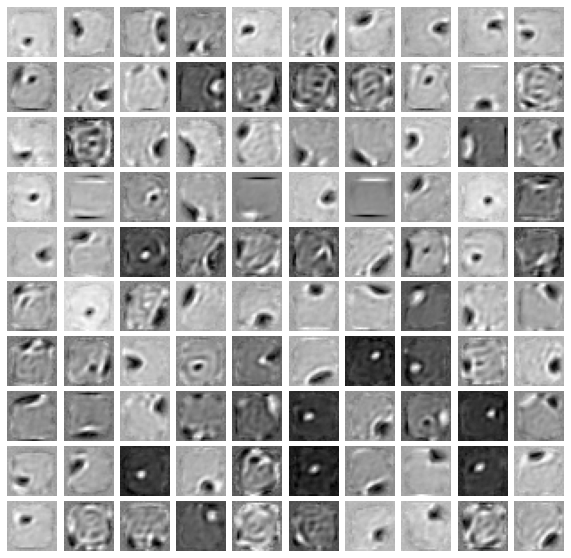

In [23]:
# our weight vector is
mnistRbm.plot_weights(mnistRbm.vhW,"finalWeight")

/Users/JoeKifle/Documents/EDU/Pisa_2020_2021/Semester_2/ISPR/Midterm2/ISPR-RBM-From-scratch-implementaion/RBM.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(10, 10, gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(10, 10))


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

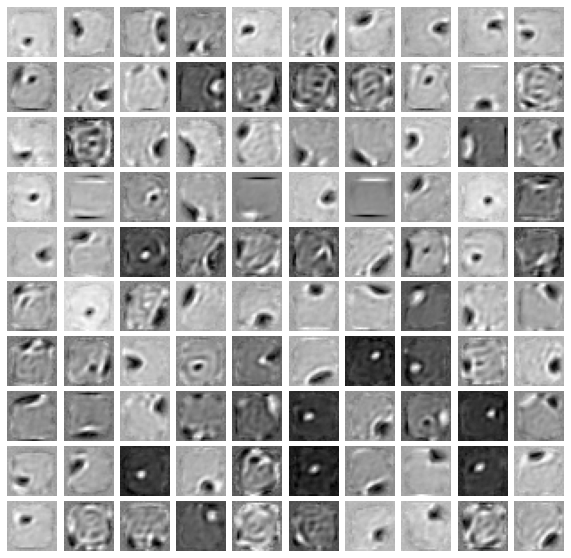

In [24]:

for i in range(len(weightsIteration)):
    mnistRbm.plot_weights(weightsIteration[i],"weights/iterationWeight_{0}".format(i+1))


#### Now we got our weight and bias of our Model. We can encode all the images using our activation of the hidden neuron

<Figure size 432x288 with 0 Axes>

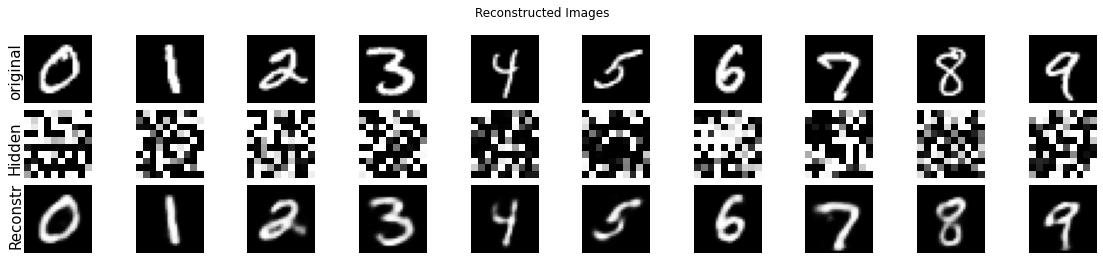

In [36]:
recontructingImages(mnistRbm, selected_imgs)

In [14]:

def recontructingImages(mnistRbm, images):
    
    num_samples = len(images)
    plt.clf()
    fig, axes = plt.subplots(3, num_samples, gridspec_kw = {'wspace':0, 'hspace':0.1}, figsize=(2*num_samples, 4))
    fig.suptitle(title)
    text = axes[0, 0].text(-7, 14,"original", size=15,
                           verticalalignment='center', rotation=-270)
    text = axes[1, 0].text(-3, 5,"Hidden", size=15,
                           verticalalignment='center', rotation=-270)
    text = axes[2, 0].text(-7, 12,"Reconstr", size=15,
                           verticalalignment='center', rotation=-270)
    for n in range(num_samples):
        visble, hidden = mnistRbm.reconstruct(images[n].reshape(28*28))
        axes[0, n].imshow(images[n].reshape(28, 28), cmap='gray')
        axes[1, n].imshow(hidden.reshape(10, 10), cmap='gray')
        axes[2, n].imshow(visble.reshape(28, 28), cmap='gray')
        axes[0, n].axis('off')
        axes[1, n].axis('off')
        axes[2, n].axis('off')

    plt.savefig("weightMatrix")
    plt.show()
    plt.close()